In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import pycountry

In [2]:
#read data
earthquake_data = pd.read_csv('datasets_700807_1225257_Worldwide-Earthquake-database.csv')
earthquake_data.head() #Preview data

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
0,1,No,-2150,NaN,NaN,NaN,NaN,,NaN,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Yes,-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,No,-2000,NaN,NaN,NaN,NaN,NaN,18.0,7.1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
3,5877,Yes,-1610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,8,No,-1566,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
earthquake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193 entries, 0 to 6192
Data columns (total 47 columns):
I_D                                   6193 non-null int64
FLAG_TSUNAMI                          6193 non-null object
YEAR                                  6193 non-null int64
MONTH                                 5786 non-null float64
DAY                                   5632 non-null float64
HOUR                                  4151 non-null float64
MINUTE                                3946 non-null float64
SECOND                                4347 non-null object
FOCAL_DEPTH                           3228 non-null float64
EQ_PRIMARY                            4402 non-null float64
EQ_MAG_MW                             1321 non-null float64
EQ_MAG_MS                             2928 non-null float64
EQ_MAG_MB                             1802 non-null float64
EQ_MAG_ML                             184 non-null float64
EQ_MAG_MFA                            14 non-null float64
EQ

In [4]:
earthquake_data.describe()

,I_D,YEAR,MONTH,DAY,HOUR,MINUTE,FOCAL_DEPTH,EQ_PRIMARY,EQ_MAG_MW,EQ_MAG_MS,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
count,6193.000000,6193.000000,5786.000000,5632.000000,4151.000000,3946.000000,3228.000000,4402.000000,1321.000000,2928.000000,...,25.00000,26.000000,1253.000000,1433.000000,453.000000,3273.000000,8.130000e+02,1777.000000,4.210000e+02,809.000000
mean,4771.385112,1805.694009,6.508296,15.741655,11.303060,28.820578,41.123916,6.459223,6.513475,6.574761,...,1910.68000,1.807692,2390.834796,1.951849,1904.812208,2.204400,1.828339e+04,2.697243,5.985086e+04,2.464771
std,3004.473731,375.314913,3.451206,8.751377,7.031131,17.153131,70.448975,1.044992,0.929940,0.990647,...,8667.79685,1.059027,27489.582539,1.079804,12509.939103,1.039891,1.955296e+05,1.051896,1.023722e+06,1.131921
min,1.000000,-2150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.600000,3.600000,2.100000,...,1.00000,1.000000,1.000000,1.000000,0.010000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000
25%,2186.000000,1820.000000,4.000000,8.000000,5.000000,14.000000,10.000000,5.700000,5.800000,5.800000,...,5.00000,1.000000,10.000000,1.000000,5.000000,1.000000,6.300000e+01,2.000000,9.000000e+01,1.000000
50%,4688.000000,1928.000000,7.000000,16.000000,11.000000,29.000000,25.000000,6.500000,6.500000,6.600000,...,21.00000,1.000000,41.000000,1.000000,30.000000,2.000000,5.060000e+02,3.000000,6.760000e+02,3.000000
75%,6589.000000,1988.000000,9.000000,23.000000,17.000000,43.750000,40.000000,7.300000,7.200000,7.300000,...,138.00000,3.000000,200.000000,3.000000,300.000000,3.000000,3.600000e+03,3.000000,3.000000e+03,3.000000
max,10501.000000,2020.000000,12.000000,31.000000,23.000000,59.000000,675.000000,9.500000,9.500000,9.100000,...,43476.00000,4.000000,799000.000000,4.000000,220085.456000,4.000000,5.360000e+06,4.000000,2.100000e+07,4.000000


In [5]:
earthquake_data.isnull().sum()

I_D                                      0
FLAG_TSUNAMI                             0
YEAR                                     0
MONTH                                  407
DAY                                    561
HOUR                                  2042
MINUTE                                2247
SECOND                                1846
FOCAL_DEPTH                           2965
EQ_PRIMARY                            1791
EQ_MAG_MW                             4872
EQ_MAG_MS                             3265
EQ_MAG_MB                             4391
EQ_MAG_ML                             6009
EQ_MAG_MFA                            6179
EQ_MAG_UNK                            5416
INTENSITY                             3378
COUNTRY                                  0
STATE                                 5872
LOCATION_NAME                            1
LATITUDE                                49
LONGITUDE                               49
REGION_CODE                              1
DEATHS     

In [6]:
earthquake_data.shape #Total number of row and columns 

(6193, 47)

As we can see total number of data (Rows) is *6193*. Almost all attribute are having more tham 50% of null value. If we remove all nissing value, we will end up with no data. So I have decided to leave null value as it is.

Text(0.5, 0, 'Focal depth')

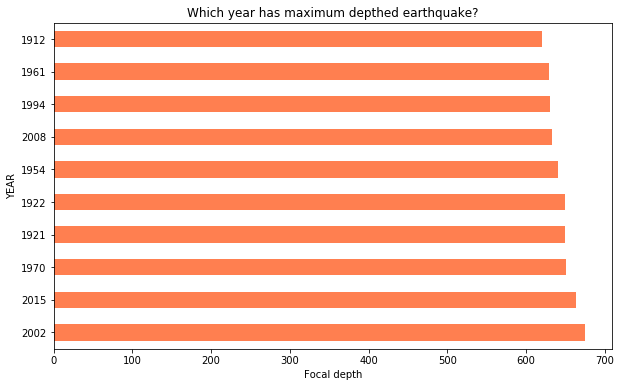

In [7]:
data_year= earthquake_data.groupby("YEAR")["FOCAL_DEPTH"].max()

data_year.sort_values(ascending=False).head(10).plot(kind="barh",title="Which year has maximum depthed earthquake?",color='coral', figsize=(10,6))
plt.xlabel("Focal depth")

From above graph, it is cleared in **2002 the earthquake was having maximum value of focal deapth.**

Text(0, 0.5, 'Total number of earthquake')

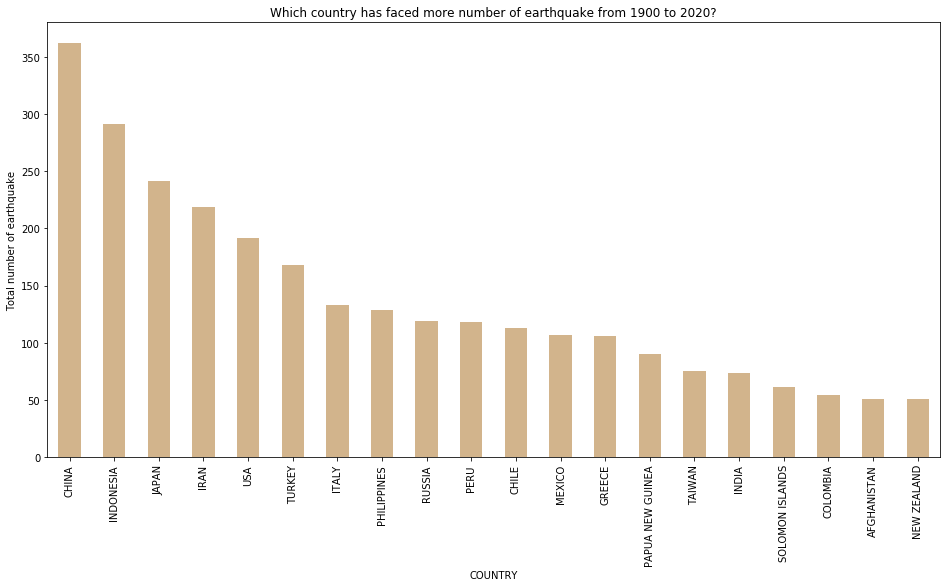

In [8]:
from_1900to2000=earthquake_data[earthquake_data['YEAR']>=1900] #filter data 

fig = plt.figure(figsize=(16,8)) 
country = from_1900to2000.groupby("COUNTRY")["YEAR"].count()
country.sort_values(ascending=False).head(20).plot(kind="bar",color='tan', title="Which country has faced more number of earthquake from 1900 to 2020?")
plt.ylabel("Total number of earthquake")

Above data is only for top 20 country. I have first filter the data from 1900 to 2020 as the original data was containing negative values which was misspelled. **The China has faced highest number of earth quake** more tha 350 times from 1900 to 2020.Indonesia is legging China by 100 counts.

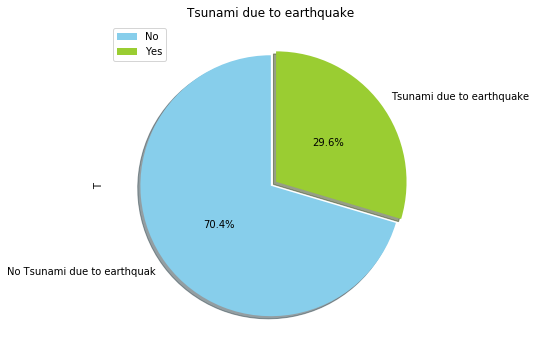

In [9]:
fig = plt.figure(figsize=(16,8)) 
colors_list = ['skyblue', 'yellowgreen']
explode_list = [0,0.05]
earthquake_data['T']= np.where(earthquake_data['FLAG_TSUNAMI']=='Yes', 1, 0)
eq=earthquake_data['T'].value_counts()
eq.plot(kind='pie',
        figsize=(15, 6),
        autopct='%1.1f%%', 
        startangle=90,    
        shadow=True,       
        colors=colors_list,
        pctdistance=0.5,# add custom colors
        explode=explode_list, 
        labels=["No Tsunami due to earthquak","Tsunami due to earthquake"]
        )
plt.title("Tsunami due to earthquake") 
plt.legend(labels=["No","Yes"], loc='upper left')

Due to earthquake almost **30% Tsunami occured.**

Text(0, 0.5, 'Total number of Tsunami')

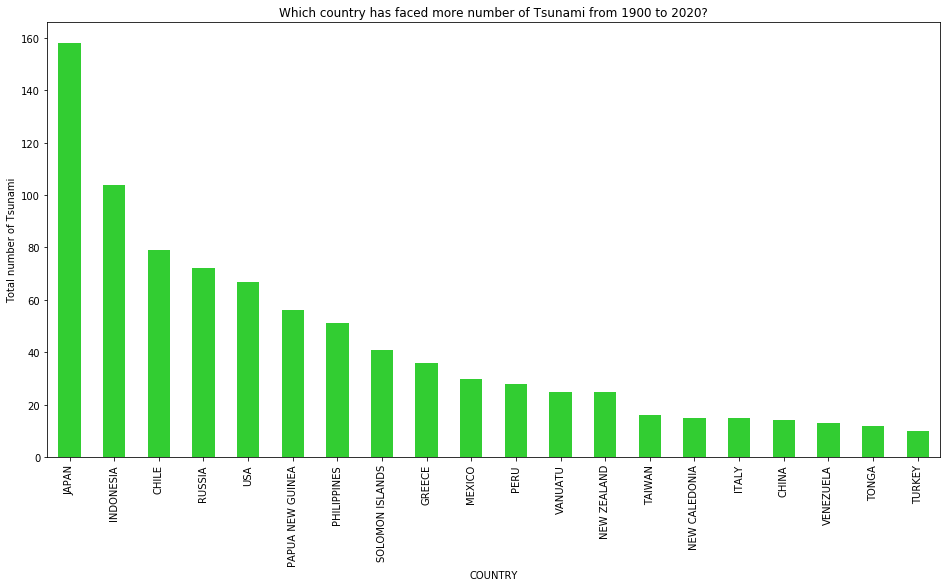

In [10]:
is_tsunami=from_1900to2000[from_1900to2000['FLAG_TSUNAMI']=='Yes']
fig = plt.figure(figsize=(16,8)) 
country = is_tsunami.groupby("COUNTRY")["YEAR"].count()
country.sort_values(ascending=False).head(20).plot(kind="bar",color='limegreen', title="Which country has faced more number of Tsunami from 1900 to 2020?")
plt.ylabel("Total number of Tsunami")

Above data is only for top 20 country. I have first filter the data from 1900 to 2020 as the original data was containing negative values which was misspelled.**Japan has faced highest number of Tsunami** due to earthquake from 1900 to 2020.

In [38]:
total_death=earthquake_data.groupby('COUNTRY')['DEATHS'].sum().reset_index(name ='D_COUNT')
countries = {}
for country in pycountry.countries:
    countries[country.name.upper()] = country.alpha_3

total_death['code'] = [countries.get(country, np.NaN) for country in total_death['COUNTRY']]

print(total_death[total_death['code'].isnull()])

                                  COUNTRY    D_COUNT code
7                          ATLANTIC OCEAN        0.0  NaN
11                      AZORES (PORTUGAL)     6154.0  NaN
15                             BERING SEA        0.0  NaN
17                                BOLIVIA      111.0  NaN
18                     BOSNIA-HERZEGOVINA       47.0  NaN
20                 BRITISH VIRGIN ISLANDS        0.0  NaN
25                         CANARY ISLANDS        0.0  NaN
33                          COTE D'IVOIRE        0.0  NaN
37                         CZECH REPUBLIC        2.0  NaN
63                           INDIAN OCEAN        0.0  NaN
65                                   IRAN  1036683.0  NaN
75         KERMADEC ISLANDS (NEW ZEALAND)        0.0  NaN
78                                   LAOS        0.0  NaN
81                              MACEDONIA     1083.0  NaN
87             MICRONESIA, FED. STATES OF        0.0  NaN
93                        MYANMAR (BURMA)     1173.0  NaN
99            

<p>The goal is to find out total death and plot that data on world map. Hence, I grouped by country.<br> To plot data on world map I required iso3 code of country. For this I used python library pycountry. But due to mismatch in country name of library and dataset, total 31 code came null. There are some country having high number of death count were having code valur null.

In [43]:
code_dics={'AZORES (PORTUGAL)':'PRT','BOLIVIA':'BOL','BOSNIA-HERZEGOVINA':'BIH',
       'IRAN':'IRN','KERMADEC ISLANDS (NEW ZEALAND)':'NZL','MACEDONIA':'MKD',
       'MYANMAR (BURMA)':'MMR','NORTH KOREA':'PRK','RUSSIA':'RUS','SOUTH KOREA':'KOR',
       'SYRIA':'SYR','TAIWAN':'TWN','UK':'GBR','USA':'USA','VENEZUELA':'VEN', 'TANZANIA':'TZA', 'VIETNAM':'VNM',
        'CZECH REPUBLIC':'CZE'}
print(total_death.columns)
for key,value in code_dics.items():
    total_death.loc[total_death['COUNTRY'].eq(key), 'code'] = value


Index(['COUNTRY', 'D_COUNT', 'code'], dtype='object')


To change code value from null I created dictionary. 

In [48]:
total_death.dropna(inplace=True)


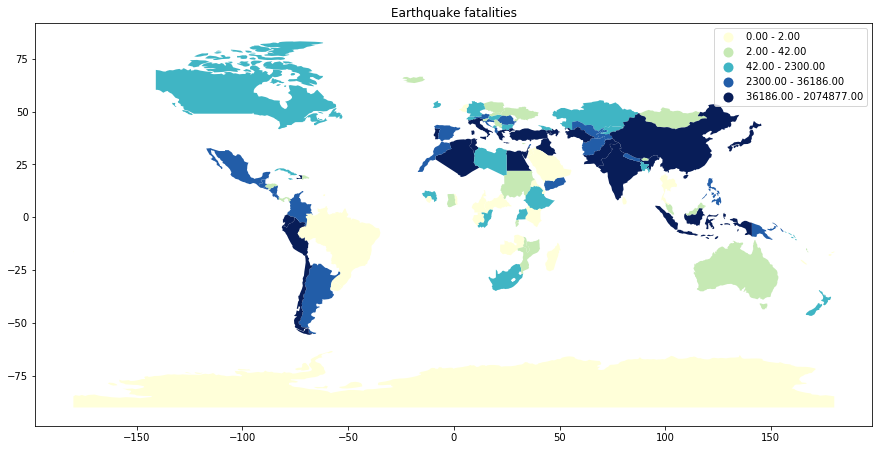

In [53]:
import plotly.express as px
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

for_plotting = world.merge(total_death,left_on = 'iso_a3', right_on = 'code')

ax = for_plotting.dropna().plot(column='D_COUNT', cmap =    
                                'YlGnBu', figsize=(15,9),   
                                 scheme='quantiles', legend =  
                                  True);
ax.set_title("Earthquake fatalities")
plt.show()